### **SLIDO ANALYTICS ASSESSMENT SOLUTION**
Customer's Sales Data Insights


In [1]:
import pandas as pd                                                       #Import useful libraries
import numpy as np
from datetime import datetime


col_name = ['domain_name', 'users', 'plan', 'price', 'event_id', 'joined_participants', 'active_participants', 'avg_join', 
             'avg_active', 'date_signup', 'date_subscription', 'date']

data = pd.read_csv("/content/_data.db.csv", names=col_name, low_memory=False) 

data_all = data.iloc[0:,:]
data.head()

,domain_name,users,plan,price,event_id,joined_participants,active_participants,avg_join,avg_active,date_signup,date_subscription,date
0,lee.com,16,Professional,5400,7,143,88,143,88,2020-02-12,2020-02-12,2020-12-29
1,francis-ellis.com,19,Professional,6300,8,80,68,80,68,2020-11-09,2020-11-16,2021-02-05
2,hale.com,20,Professional,6600,16,93,51,93,51,2020-06-08,2020-07-18,2021-01-23
3,mcclure.com,5,Enterprise,4200,17,136,128,136,128,2020-05-04,2020-05-21,2021-01-09
4,robinson.biz,5,Enterprise,4200,27,161,93,161,93,2020-01-25,2020-02-26,2020-10-27


In [2]:
# Check for duplicates
data.duplicated().sum()

0

In [3]:
# Check for null values
data.isnull().sum()

domain_name            0
users                  0
plan                   0
price                  0
event_id               0
joined_participants    0
active_participants    0
avg_join               0
avg_active             0
date_signup            0
date_subscription      0
date                   0
dtype: int64

In [4]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   domain_name          614 non-null    object
 1   users                614 non-null    int64 
 2   plan                 614 non-null    object
 3   price                614 non-null    int64 
 4   event_id             614 non-null    int64 
 5   joined_participants  614 non-null    int64 
 6   active_participants  614 non-null    int64 
 7   avg_join             614 non-null    int64 
 8   avg_active           614 non-null    int64 
 9   date_signup          614 non-null    object
 10  date_subscription    614 non-null    object
 11  date                 614 non-null    object
dtypes: int64(7), object(5)
memory usage: 57.7+ KB


#Neccessary libraries for Analysis:

In [5]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 150)
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_colwidth', None)

#Exploratory Data Analysis (EDA):

In [6]:
print("There are \033[1m{} companies\033[0m ".format(len(data_all['domain_name'].value_counts().to_list())))

There are 20 companies 


In [7]:
#Print out all unique Companies domain name

data['domain_name'].unique()

array(['lee.com', 'francis-ellis.com', 'hale.com', 'mcclure.com',
       'robinson.biz', 'roy.net', 'sutton.com', 'martin.net',
       'atkinson.org', 'turner.biz', 'keller-potter.net', 'gar',
       'guerrero.com', 'jones-bradley.com', 'soto.biz', 'edwards.com',
       'frank-mahoney.biz', 'smith.com', 'wilson.org', 'garcia.biz'],
      dtype=object)

In [8]:
fig = px.treemap(data_all, path=['domain_name'], color='domain_name')
fig.update_layout(margin = dict(t=60, l=15, r=15, b=15),
                  title_text="<b>Companies Distribution</b>",
                  title_x=0.5,
                  font=dict(family="serif", size=20, color='#000000'))
fig.show()

In [9]:
data_martin = data[data['domain_name']=='martin.net']
questions = data.iloc[0, :]
print("Martin.net Respondents:", data_martin.shape[0])

Martin.net Respondents: 70


In [10]:
data_mcclure = data[data['domain_name']=='mcclure.com']
questions = data.iloc[0, :]
print("Mcclure.com Respondents:", data_mcclure.shape[0])

Mcclure.com Respondents: 70


In [11]:
data_soto = data[data['domain_name']=='soto.biz']
questions = data.iloc[0, :]
print("Soto.biz Respondents:", data_soto.shape[0])

Soto.biz Respondents: 2


In [12]:
#Count all domain name appearance 

data['domain_name'].value_counts()

martin.net           70
mcclure.com          70
robinson.biz         62
turner.biz           60
lee.com              39
guerrero.com         39
keller-potter.net    38
sutton.com           32
smith.com            30
jones-bradley.com    28
roy.net              22
atkinson.org         21
gar                  19
hale.com             17
francis-ellis.com    16
frank-mahoney.biz    16
wilson.org           16
edwards.com          11
garcia.biz            6
soto.biz              2
Name: domain_name, dtype: int64

# Displaying Distribution Percentage for each company.


In [13]:
#List of the companies involved
company_names=['lee.com','francis-ellis.com','hale.com','mcclure.com','robinson.biz','roy.net','sutton.com',
               'martin.net','atkinson.org','turner.biz','keller-potter.net','gar','guerrero.com','jones-bradley.com',
               'soto.biz','edwards.com','frank-mahoney.biz','smith.com','wilson.org','garcia.biz'] 

company = data[data['domain_name'].isin(company_names)]
company = company["domain_name"].value_counts(normalize=True, ascending=True) 

#Count the number of companies and express it as a fraction
company = company.mul(100) #multiply the values by 100 (i.e. percentage)
company = company.rename("percentage (%)").reset_index()
company = company.rename(columns={"index":"company"})
company = company.round(decimals=1) 


company["color"] = "gold" # color the others gold
company.loc[company["company"] == "martin.net", ["color"]] = "green" 

fig = px.bar(company, y="company", x="percentage (%)", text='percentage (%)', 
             title="Ranking of companies based on number of occurences in percentage (%)", orientation="h")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside', marker_color=company.color) 
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', plot_bgcolor = "white")

fig.show()

**Alternative:**

In [14]:
fig =  px.pie(data, names = "domain_name", hole = 0.4, template = "gridon")
fig.show ()

#Showing highest amount spent on each of the subcription plan categories:

In [15]:
fig = px.histogram(data, x = "price",  facet_row = "plan",  template = 'plotly_dark')
fig.show ()

In [16]:
#Let's see a plot of most subscribed plan by customers

fig =  px.pie(data, names = "plan", hole = 0.4, title = 'Most Subscribed Plan by Customers', template = "gridon")
fig.show ()

**Observation: 37.9% of the customers chose Enterprise plan, 32.1% chose Professional plan while 30% chose Engage plan.**

#Checking the newest and oldest recorded subcription dates.

In [17]:
data["date_subscription"] = pd.to_datetime(data["date_subscription"])
dates = []
for i in data["date_subscription"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's subscription date in the records:",max(dates))
print("The oldest customer's subscription date in the records:",min(dates))

The newest customer's subscription date in the records: 2021-06-04
The oldest customer's subscription date in the records: 2020-02-12


#Checking the newest and oldest recorded sign-up dates

In [18]:
data["date_signup"] = pd.to_datetime(data["date_signup"])
dates = []
for i in data["date_signup"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's sign-up date in the records:",max(dates))
print("The oldest customer's sign-up date in the records:",min(dates))

The newest customer's sign-up date in the records: 2021-04-08
The oldest customer's sign-up date in the records: 2020-01-25


**DERIVING TOTAL NUMBER OF DAYS THAT EACH CUSTOMER COMPANY WAS FULLY ENGAGED WITH SLIDO IN TERMS OF SUBSCRIPTION**

In [19]:
from datetime import datetime

to_day = datetime.today().strftime('%Y-%m-%d')
today = pd.to_datetime(to_day)

data['date_subscription'] = pd.to_datetime(data.date_subscription)
data['Day_engaged'] = (today - data['date_subscription']).dt.days

**DERIVING LIFESPAN OF EACH CUSTOMER COMPANY WITH SLIDO (in days)**

In [20]:
data['date_signup'] = pd.to_datetime(data.date_signup)
data['Customer_lifespan'] = (today - data['date_signup']).dt.days

In [21]:
data.head()

,domain_name,users,plan,price,event_id,joined_participants,active_participants,avg_join,avg_active,date_signup,date_subscription,date,Day_engaged,Customer_lifespan
0,lee.com,16,Professional,5400,7,143,88,143,88,2020-02-12,2020-02-12,2020-12-29,754,754
1,francis-ellis.com,19,Professional,6300,8,80,68,80,68,2020-11-09,2020-11-16,2021-02-05,476,483
2,hale.com,20,Professional,6600,16,93,51,93,51,2020-06-08,2020-07-18,2021-01-23,597,637
3,mcclure.com,5,Enterprise,4200,17,136,128,136,128,2020-05-04,2020-05-21,2021-01-09,655,672
4,robinson.biz,5,Enterprise,4200,27,161,93,161,93,2020-01-25,2020-02-26,2020-10-27,740,772


#Deriving total number of years spent so far by each customer company with the Slido

Unique categories present in the year_spent: 2    575
1     39
Name: year_spent, dtype: int64




<Figure size 576x576 with 0 Axes>

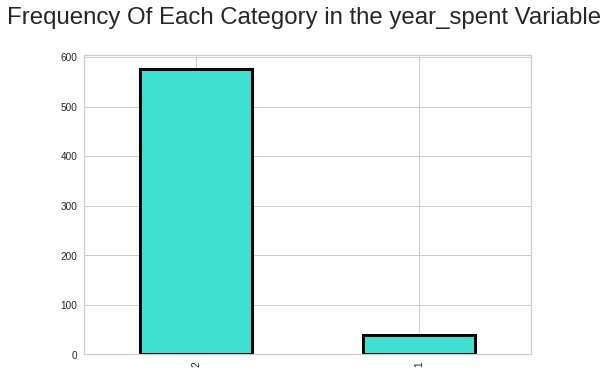

<Figure size 576x576 with 0 Axes>

In [22]:
#ADDING A COLUMN "year_spent" IN THE DATAFRAME
data['year_spent'] = (pd.Timestamp('now').year) - (pd.to_datetime(data['date_signup']).dt.year)

#CHECKING NUMBER OF UNIQUE CATEGORIES PRESENT IN THE "year_spent"
print("Unique categories present in the year_spent:",data['year_spent'].value_counts())
print("\n")


#VISUALIZING THE "year_spent"
data['year_spent'].value_counts().plot(kind='bar',color = 'turquoise',edgecolor = "black",linewidth = 3)
plt.title("Frequency Of Each Category in the year_spent Variable \n",fontsize=24)
plt.figure(figsize=(8,8))

#OBSERVATIONS:-

- **57.00% are 2 years old customers.**
- **43.00% are 1 year old customers.**

#How subcription plan impacts or affects the price?

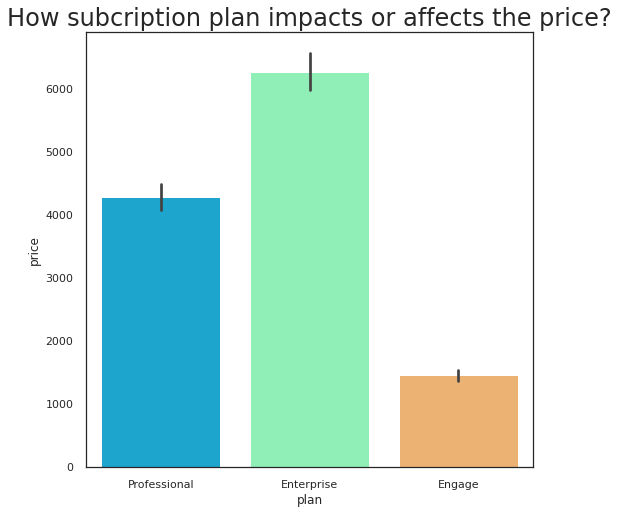

In [23]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("How subcription plan impacts or affects the price?",fontsize=24)
ax = sns.barplot(x="plan", y="price", data=data,palette="rainbow")

**Observation: Most money was spent on enterprise plan by our customers**

**Account users and subcription plan?**

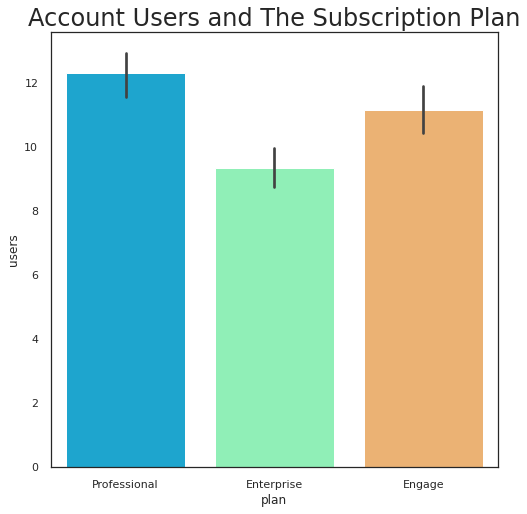

In [24]:
sns.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Account Users and The Subscription Plan",fontsize=24)
ax = sns.barplot(x="plan", y="users", data=data,palette="rainbow")

**Observation: Professional plan had more users followed by Engage then Enterprise**

#Total cost spent by each company on subcription


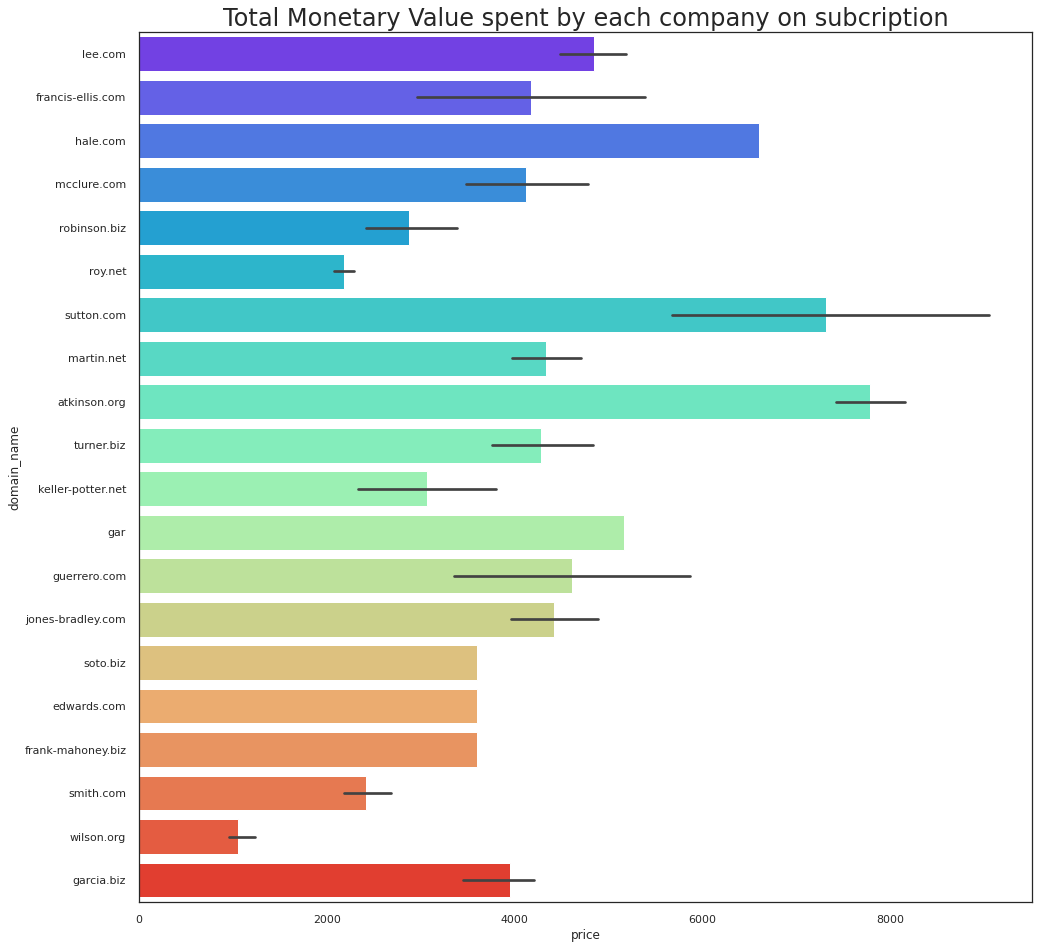

In [25]:
sns.set_theme(style="white")
plt.figure(figsize=(16,16))
plt.title("Total Monetary Value spent by each company on subcription",fontsize=24)
ax = sns.barplot(x="price", y="domain_name", data=data,palette="rainbow")

#It is important we know the customers that subscribed most to each plan

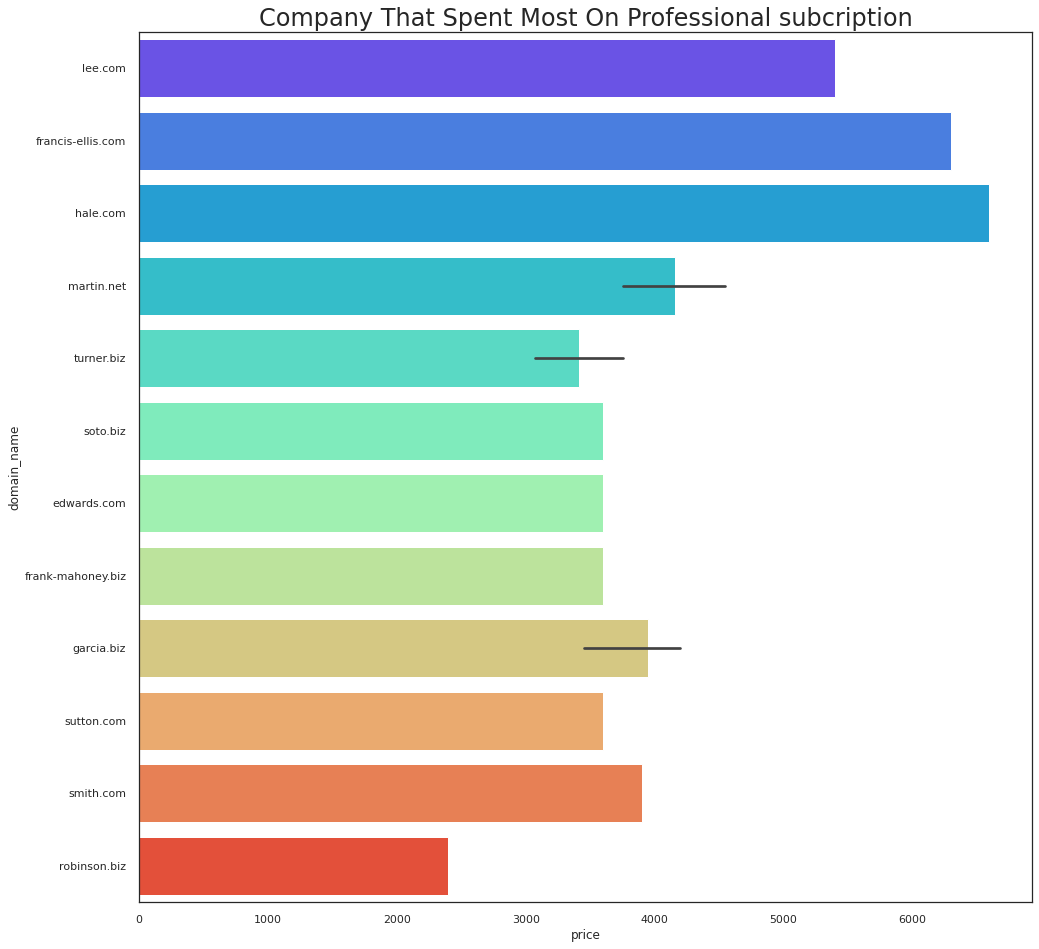

In [26]:
#Professional Plan

prof_plan = data[data['plan'] == 'Professional']


sns.set_theme(style="white")
plt.figure(figsize=(16,16))
plt.title("Company That Spent Most On Professional subcription",fontsize=24)
ax = sns.barplot(x='price', y="domain_name", data=prof_plan,palette="rainbow")

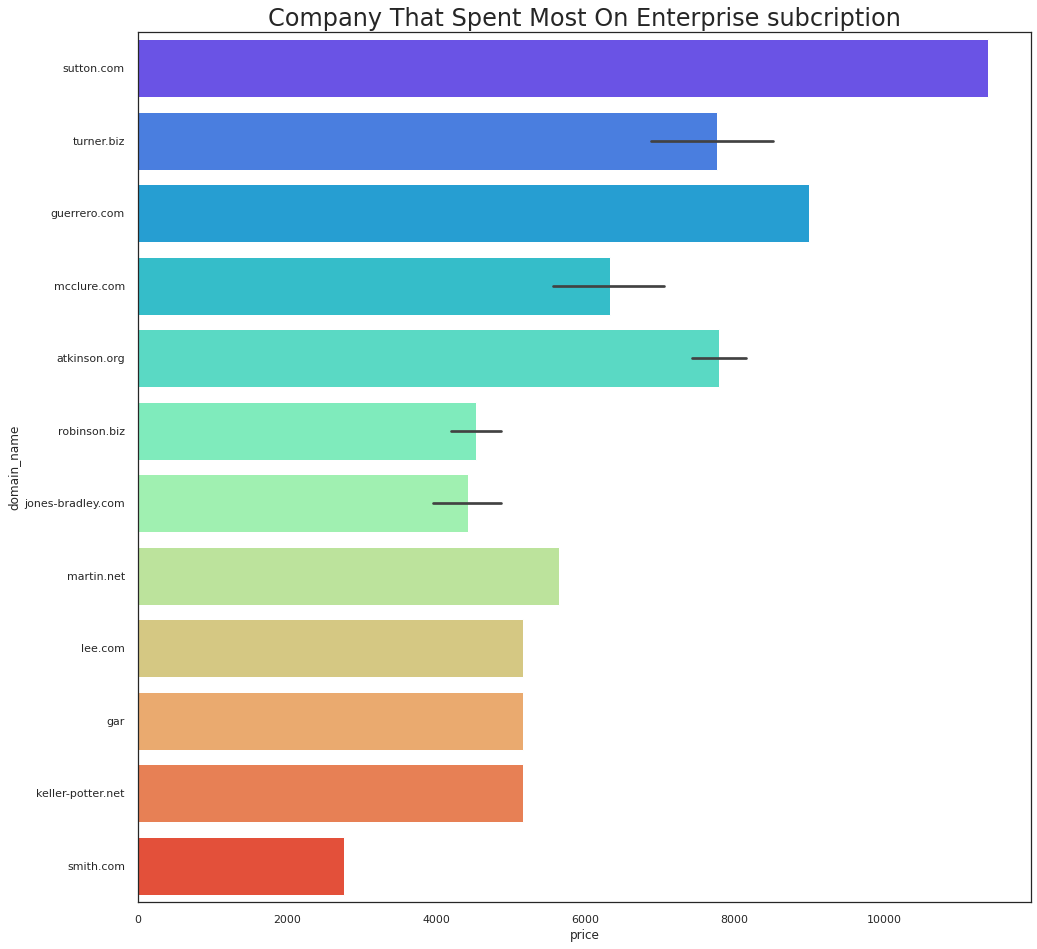

In [27]:
#Enterprise Plan

enter_plan = data[data['plan'] == 'Enterprise']

sns.set_theme(style="white")
plt.figure(figsize=(16,16))
plt.title("Company That Spent Most On Enterprise subcription",fontsize=24)
ax = sns.barplot(x='price', y="domain_name", data=enter_plan.sort_values(by='price', ascending=False),palette="rainbow")
                                      

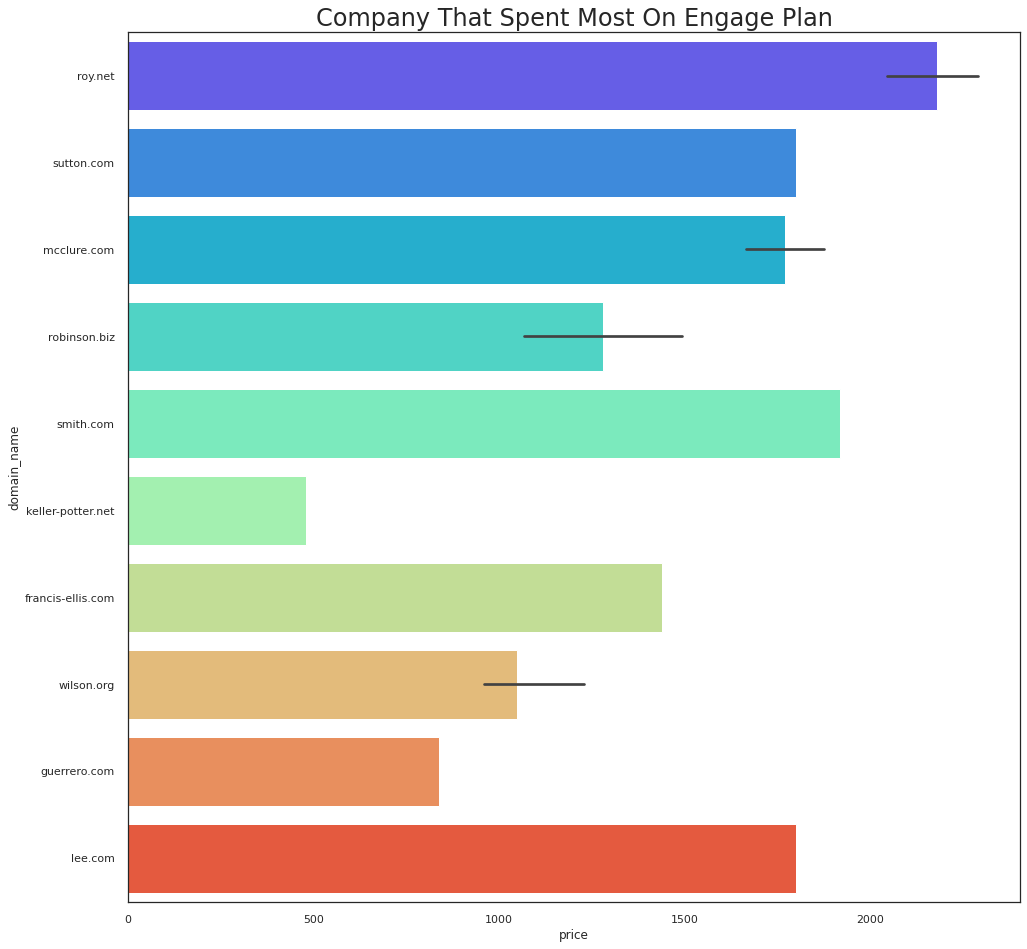

In [28]:
#Engage Plan

eng_plan = data[data['plan'] == 'Engage']

sns.set_theme(style="white")
plt.figure(figsize=(16,16))
plt.title("Company That Spent Most On Engage Plan",fontsize=24)
ax = sns.barplot(x='price', y="domain_name", data=eng_plan,palette="rainbow")                                      

**Observation:** 
 - **Hale.com, Lee.com and Francis-ellis.com** as spent the most money on professional plan
 - **Sutton.net and Guerrero.com** spent the most money on enterprise pla
 - **Roy.net, Smith.com, Lee.com and Sutton.net** spent the most money on engage plan


In [29]:
#Let's take a look at the different plans by each customer company

data.groupby(['domain_name', 'plan'])['plan'].count()

domain_name        plan        
atkinson.org       Enterprise      21
edwards.com        Professional    11
francis-ellis.com  Engage           7
                   Professional     9
frank-mahoney.biz  Professional    16
gar                Enterprise      19
garcia.biz         Professional     6
guerrero.com       Engage          21
                   Enterprise      18
hale.com           Professional    17
jones-bradley.com  Enterprise      28
keller-potter.net  Engage          17
                   Enterprise      21
lee.com            Engage           5
                   Enterprise      16
                   Professional    18
martin.net         Enterprise       8
                   Professional    62
mcclure.com        Engage          34
                   Enterprise      36
robinson.biz       Engage          31
                   Enterprise      30
                   Professional     1
roy.net            Engage          22
smith.com          Engage          19
                  

#Number of active participants from each company respectively.

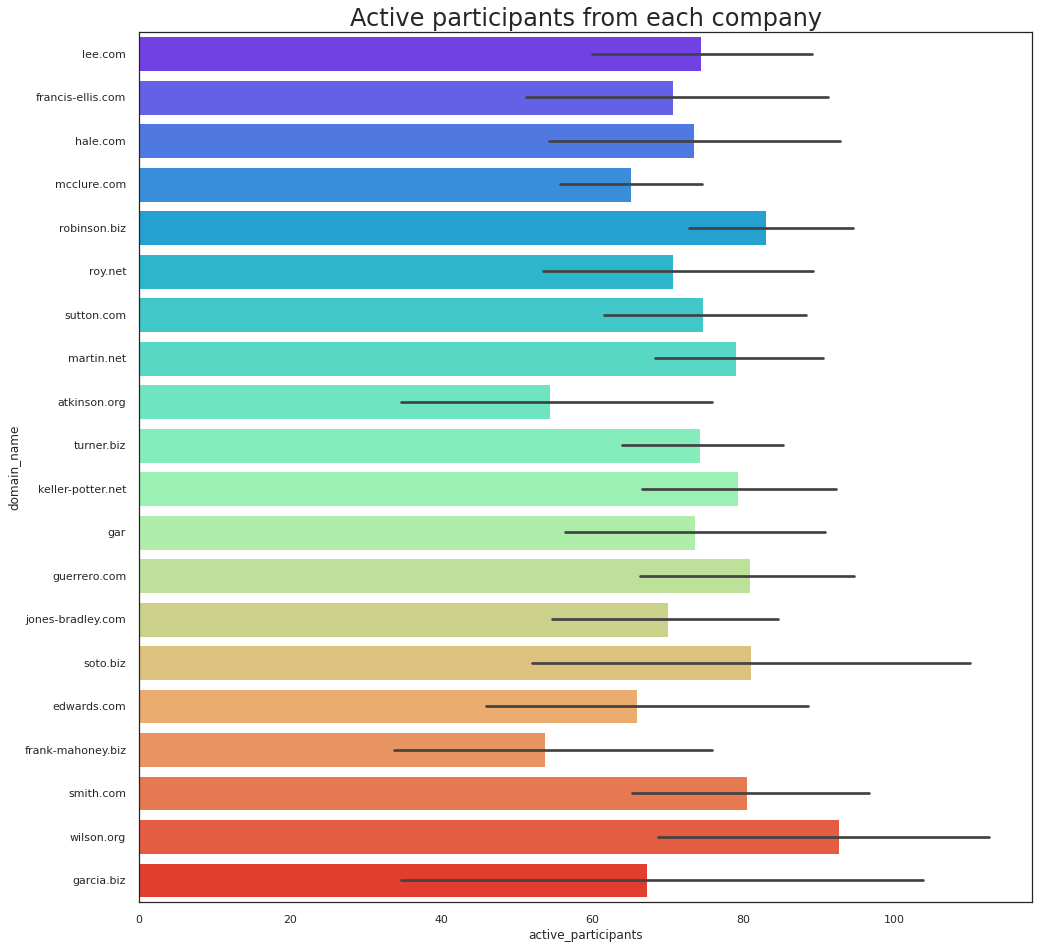

In [30]:
sns.set_theme(style="white")
plt.figure(figsize=(16,16))
plt.title("Active participants from each company",fontsize=24)
ax = sns.barplot(x="active_participants", y="domain_name", data=data,palette="rainbow")

**Deriving percentage of active participants out of total number of participants from each company.**

In [31]:
#Percentage of active participants per company

data['active_participants_percentage'] = (data['active_participants']/data['joined_participants'])*100 
data['active_participants_percentage'] = data['active_participants_percentage'].round(2)   #Round to 2 decimal places

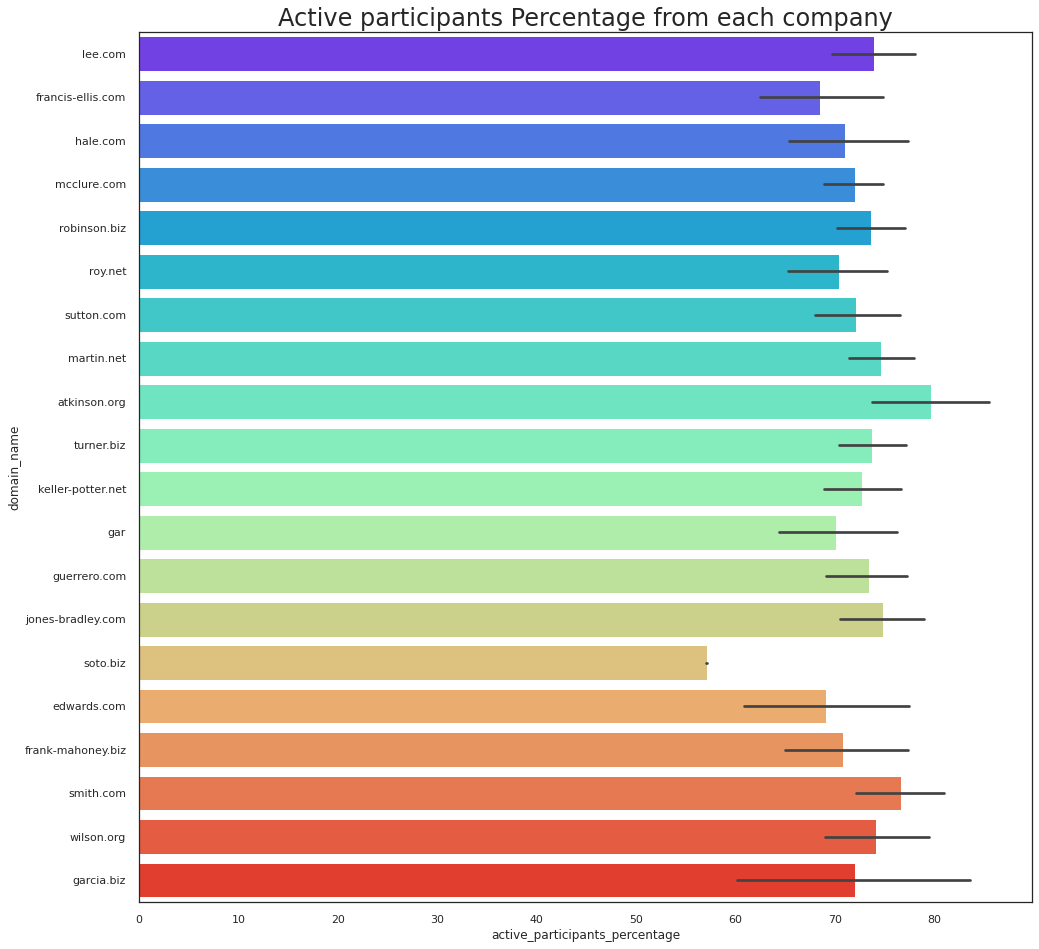

In [32]:
sns.set_theme(style="white")
plt.figure(figsize=(16,16)) 
plt.title("Active participants Percentage from each company",fontsize=24)
ax = sns.barplot(x="active_participants_percentage", y="domain_name", data=data, palette="rainbow")

In [33]:
data.head(2)

,domain_name,users,plan,price,event_id,joined_participants,active_participants,avg_join,avg_active,date_signup,date_subscription,date,Day_engaged,Customer_lifespan,year_spent,active_participants_percentage
0,lee.com,16,Professional,5400,7,143,88,143,88,2020-02-12,2020-02-12,2020-12-29,754,754,2,61.54
1,francis-ellis.com,19,Professional,6300,8,80,68,80,68,2020-11-09,2020-11-16,2021-02-05,476,483,2,85.00


**Number of users under each account**

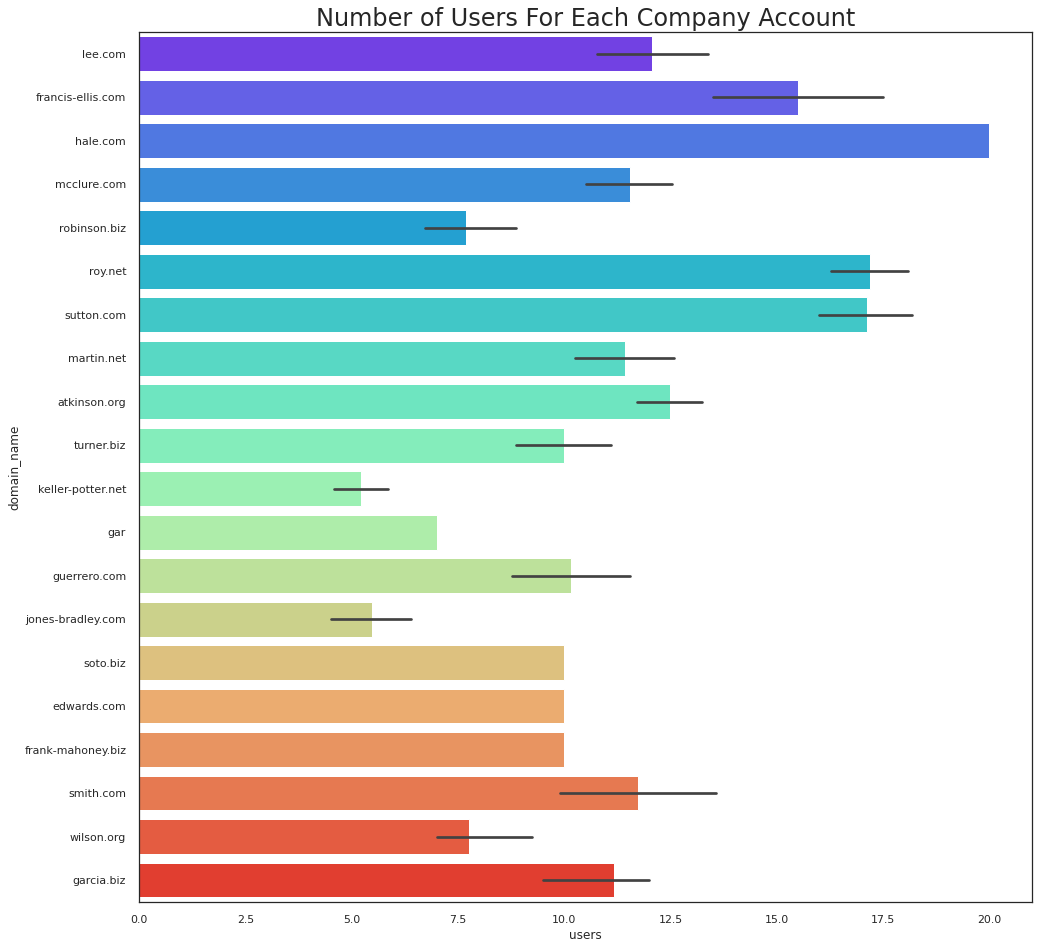

In [34]:
sns.set_theme(style="white")
plt.figure(figsize=(16,16))
plt.title("Number of Users For Each Company Account",fontsize=24)
ax = sns.barplot(x="users", y="domain_name", data=data,palette="rainbow")

**How total number of Day_engaged impacts on each customer company?**

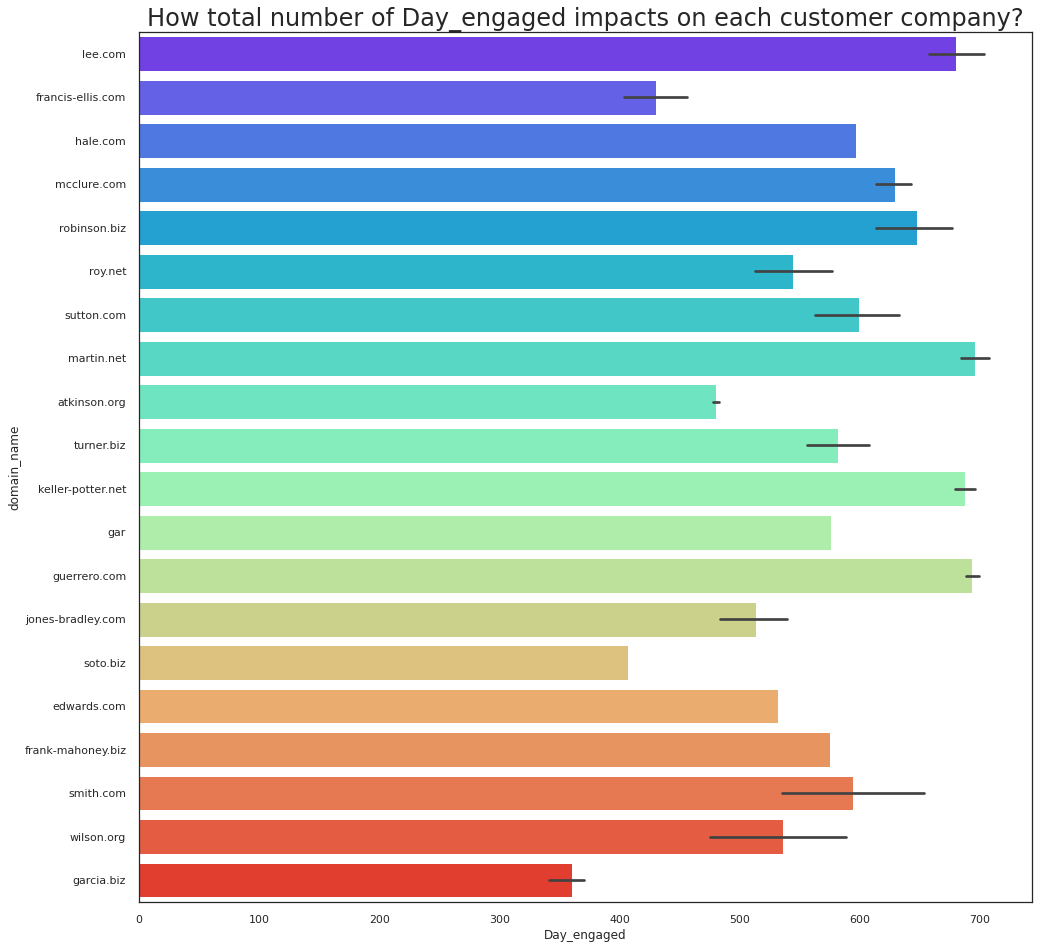

In [35]:
sns.set_theme(style="white")
plt.figure(figsize=(16,16))
plt.title("How total number of Day_engaged impacts on each customer company?",fontsize=24)
ax = sns.barplot(x="Day_engaged", y="domain_name", data=data,palette="rainbow")

**How total number of Day_engaged impacts on each subcription plan category?**

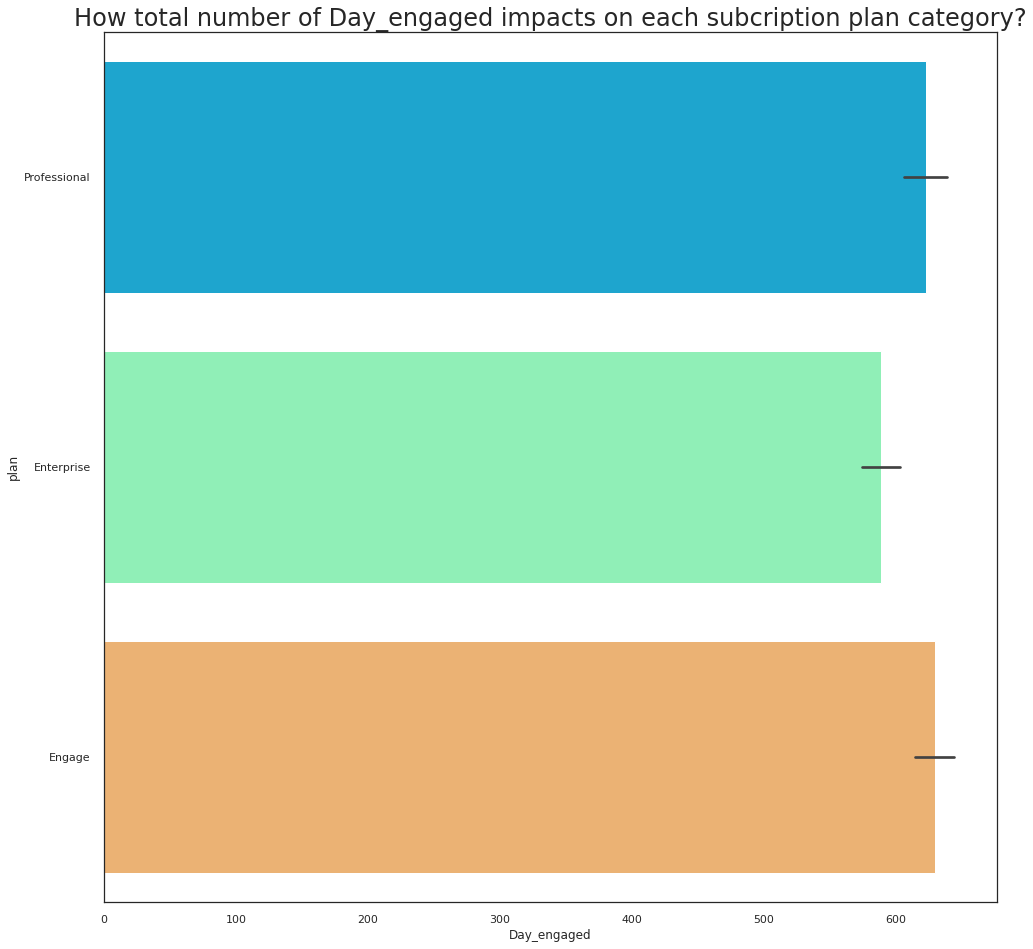

In [36]:
sns.set_theme(style="white")
plt.figure(figsize=(16,16))
plt.title("How total number of Day_engaged impacts on each subcription plan category?",fontsize=24)
ax = sns.barplot(x="Day_engaged", y="plan", data=data,palette="rainbow")

#Analysis On price Variable

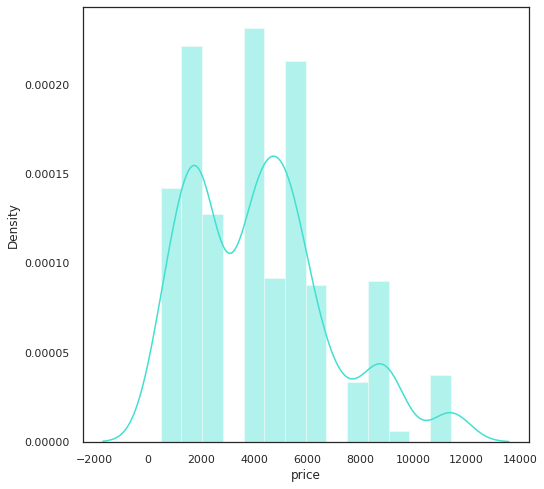

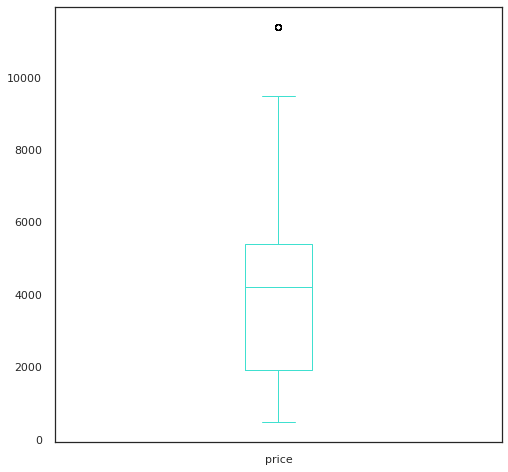

In [37]:
#Let's see a plot of price distribution

plt.figure(figsize=(8,8))
sns.distplot(data["price"],color = 'turquoise')
plt.show()
data["price"].plot.box(figsize=(8,8),color = 'turquoise')
plt.show()

Displaying relationship among all given variables using "**Correlation Matrix**" below:

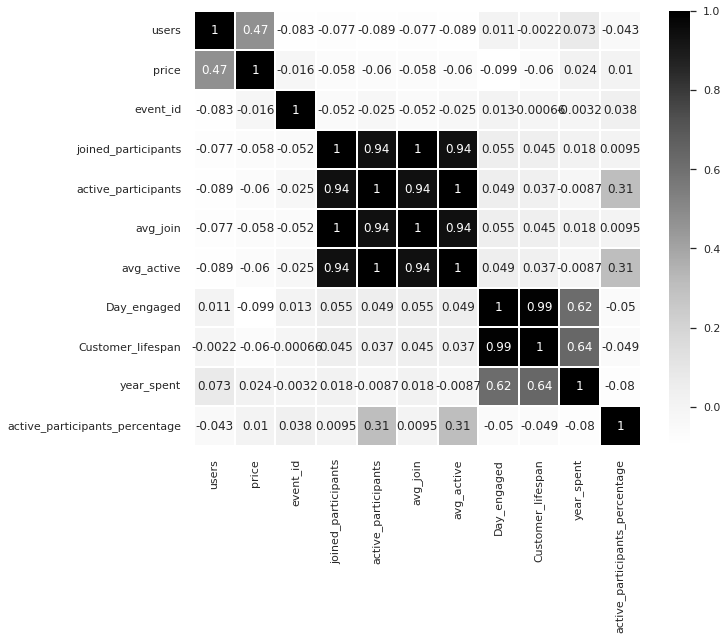

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True,cmap = 'Greys',linewidths=1)

**Slido aims to maximize profit, it will be very much necessary to test how "price" affects other numerical variables.**

In [39]:
num_cols = data.select_dtypes(include = 'number').columns.to_list() # numerical features
num_cols

['users',
 'price',
 'event_id',
 'joined_participants',
 'active_participants',
 'avg_join',
 'avg_active',
 'Day_engaged',
 'Customer_lifespan',
 'year_spent',
 'active_participants_percentage']

In [40]:
cont_features = data[num_cols]
print(type(cont_features))
print('\n')
print(cont_features.head())

<class 'pandas.core.frame.DataFrame'>


   users  price  event_id  joined_participants  active_participants  avg_join  \
0     16   5400         7                  143                   88       143   
1     19   6300         8                   80                   68        80   
2     20   6600        16                   93                   51        93   
3      5   4200        17                  136                  128       136   
4      5   4200        27                  161                   93       161   

   avg_active  Day_engaged  Customer_lifespan  year_spent  \
0          88          754                754           2   
1          68          476                483           2   
2          51          597                637           2   
3         128          655                672           2   
4          93          740                772           2   

   active_participants_percentage  
0                           61.54  
1                           85.00 

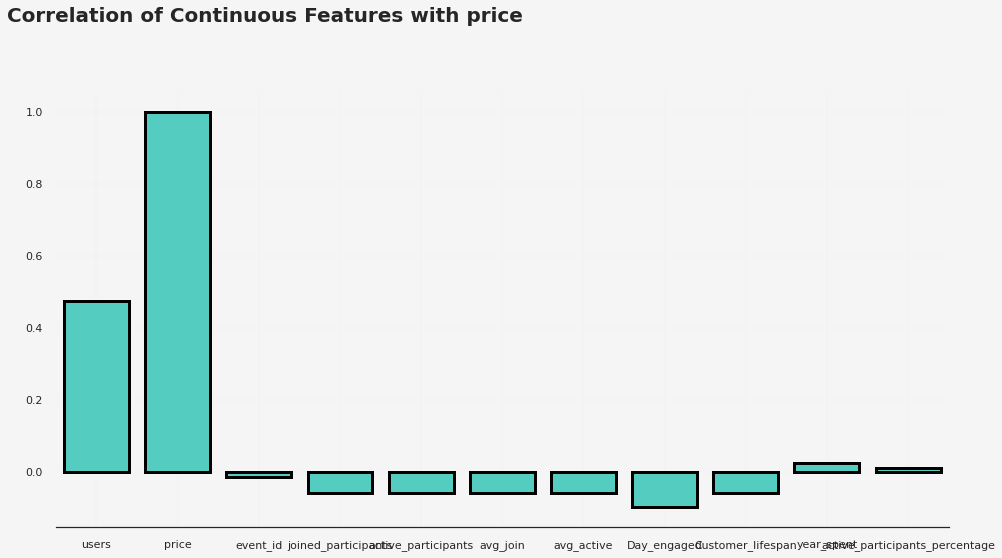

In [41]:
import matplotlib
background_color = "#f6f5f5"

fig = plt.figure(figsize=(16, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#2f5586", "#f6f5f5","#2f5586"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Continuous Features with price', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(cont_features.corrwith(data['price']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='turquoise', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

**Observation:** From the figure above, the variable "users" has the highest positive correlation value of approximately 0.47 (which can be confirmed in correlation matrix drawn above) while others have relatively negligible values (i.e very low or negative correlation values) when compared to users correlation value. Henceforth, it can be deduced that the higher the number of users, the higher the sales/price and the higher the profit generated by Slido.

**Now, let's display the number of active users under the subscription software accounts from each customer company to make our final conclusion.**

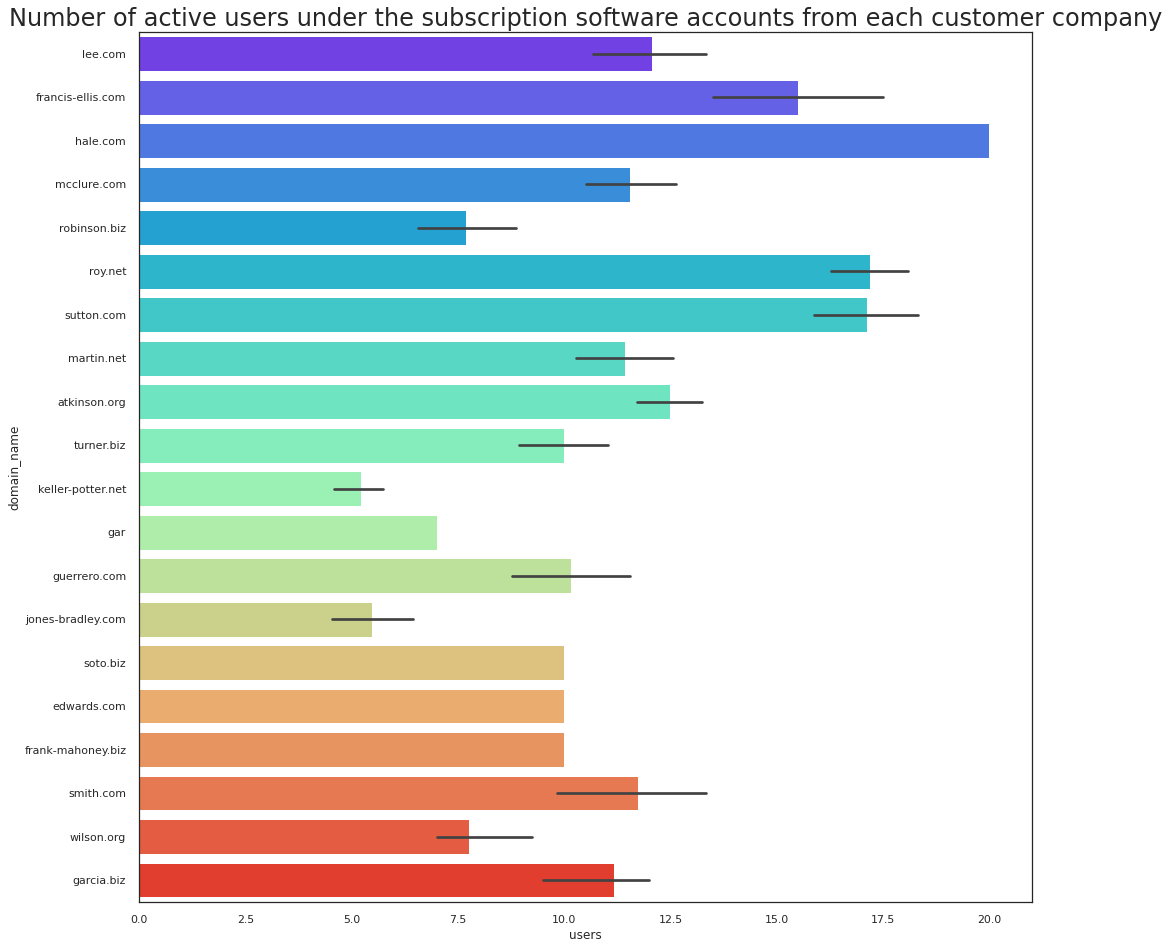

In [42]:
sns.set_theme(style="white")
plt.figure(figsize=(16,16))
plt.title("Number of active users under the subscription software accounts from each customer company",fontsize=24)
ax = sns.barplot(x="users", y="domain_name", data=data,palette="rainbow")

#CONCLUSION: 
In reference to my findings, aim and objectives of this analysis, it can be concluded from the diagram above that out of twenty(20) companies(customers) that patronize us, only **"keller.potter.net", "jones.bradley.com" & "gar"** happened to have lowest number of active software users especially if we choose 7 to be threshold (i.e our minimum number of users to be considered). Henceforth, based on their activity, all other companies worth going after for deals except the three aforementioned companies above that fall below our threshold value (7).
>Some our top customers include: **hale.com, roy.net, sutton.net, lee.com, francis-ellis.com, guerrero.com, smith.com**. They spent the most money on different annual plans and also from the graph above have most users which affect the price and sales directly.
